## Analysis of Baselines

In [1]:
import pandas as pd
import numpy as np

In [2]:
NOT_MENTIONED = 0
ENTAILMENT = 1
CONTRADICTION = 2

In [3]:
files = ["../outputs/out_nli-deberta-v3-base.txt", "../outputs/out_nli-deberta-v3-large.txt", "../outputs/out_nli-deberta-v3-small.txt", "../outputs/out_nli-MiniLM2-L6-H768.txt"]

In [4]:
def load_df(file):
    with open(file, mode="r") as f:
        lines = f.readlines()

    lines = [line.strip() for line in lines]
    predicted_label = [line.split(" ")[1].lower() for line in lines]
    true_label = [
        line.split(" ")[2].split(".")[1].lower().replace("_", "-") for line in lines
    ]

    predicted = [
        (
            ENTAILMENT
            if x == "entailment"
            else (CONTRADICTION if x == "contradiction" else NOT_MENTIONED)
        )
        for x in predicted_label
    ]
    true = [
        (
            ENTAILMENT
            if x == "entailment"
            else (CONTRADICTION if x == "contradiction" else NOT_MENTIONED)
        )
        for x in true_label
    ]

    # create a dataframe
    df = pd.DataFrame(
        columns=[
            "predicted_label",
            "true_label",
            "predicted",
            "true",
        ]
    )

    df["predicted_label"] = predicted_label
    df["true_label"] = true_label

    df["predicted"] = predicted
    df["true"] = true

    return df

In [5]:
from sklearn.metrics import classification_report

# calculate precision, recall, f1 score for each class
def calculate_metrics(df):
    y_true = df['true']
    y_pred = df['predicted']
    target_names = ['NOT_MENTIONED', 'ENTAILMENT', 'CONTRADICTION']
    report = classification_report(y_true, y_pred, target_names=target_names)
    
    return report


In [6]:
with open("../outputs/output_metrics.txt", "w") as output_file:
    for file in files:
        output_file.write(f"{file.split('/')[-1]}\n")
        df = load_df(file)
        report = calculate_metrics(df)
        output_file.write(report)
        output_file.write("\n\n")

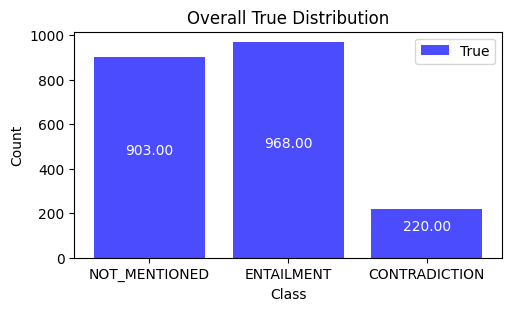

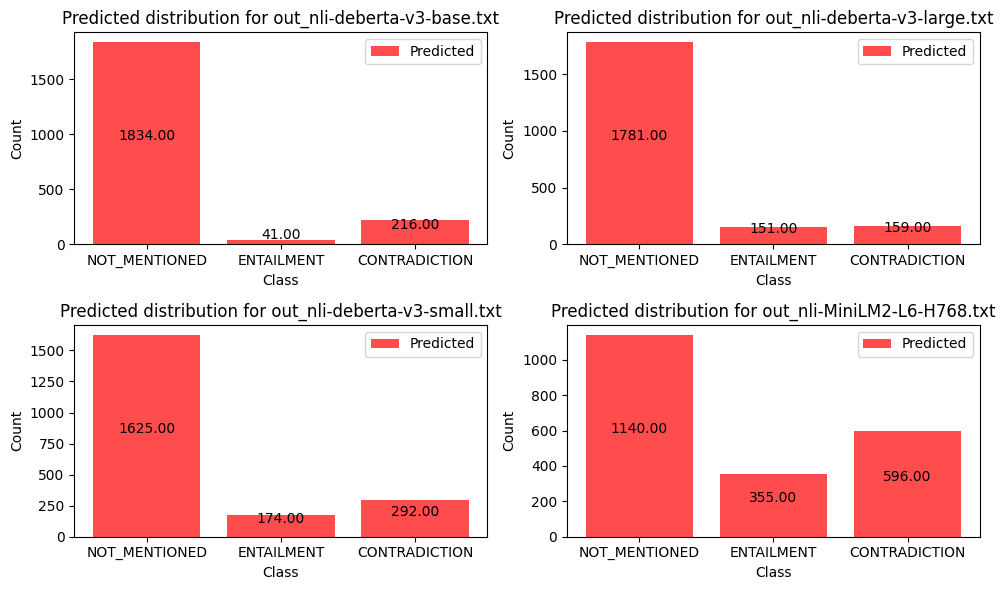

In [20]:
import matplotlib.pyplot as plt

# Calculate the overall true distribution
all_true_labels = []
for file in files:
    df = load_df(file)
    all_true_labels.extend(df['true'])
    break

true_distribution = [all_true_labels.count(NOT_MENTIONED), all_true_labels.count(ENTAILMENT), all_true_labels.count(CONTRADICTION)]

# Function to add labels to bars
def add_labels(ax, values, colour='black'):
    """Add value labels on top of the bars."""
    for i, value in enumerate(values):
        ax.text(i, value - 0.5 * value, f'{value:.2f}', ha='center', va='bottom', color=colour)

# plot true distribution and predicted distribution
def plot_distribution(df, file, true_distribution):
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    class_labels = ['NOT_MENTIONED', 'ENTAILMENT', 'CONTRADICTION']
    
    ax[0].bar(class_labels, true_distribution, color='blue', alpha=0.7, label='True')
    add_labels(ax[0], true_distribution)
    ax[0].set_title('Overall True Distribution')
    ax[0].set_xlabel('Class')
    ax[0].set_ylabel('Count')
    ax[0].legend()

    predicted_distribution = [df['predicted'].tolist().count(NOT_MENTIONED), df['predicted'].tolist().count(ENTAILMENT), df['predicted'].tolist().count(CONTRADICTION)]
    ax[1].bar(class_labels, predicted_distribution, color='red', alpha=0.7, label='Predicted')
    add_labels(ax[1], predicted_distribution)
    ax[1].set_title(f'Predicted distribution for {file.split("/")[-1]}')
    ax[1].set_xlabel('Class')
    ax[1].set_ylabel('Count')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# Plot the true distribution alone
fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
class_labels = ['NOT_MENTIONED', 'ENTAILMENT', 'CONTRADICTION']
ax.bar(class_labels, true_distribution, color='blue', alpha=0.7, label='True')
add_labels(ax, true_distribution, colour='white')
ax.set_title('Overall True Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.legend()
# plt.tight_layout()
plt.show()

# Plot all predicted distributions in a 2x2 plot
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.flatten()

for i, file in enumerate(files):
    df = load_df(file)
    predicted_distribution = [df['predicted'].tolist().count(NOT_MENTIONED), df['predicted'].tolist().count(ENTAILMENT), df['predicted'].tolist().count(CONTRADICTION)]
    axs[i].bar(class_labels, predicted_distribution, color='red', alpha=0.7, label='Predicted')
    add_labels(axs[i], predicted_distribution)
    axs[i].set_title(f'Predicted distribution for {file.split("/")[-1]}')
    axs[i].set_xlabel('Class')
    axs[i].set_ylabel('Count')
    axs[i].legend()

plt.tight_layout()
plt.show()
